## SIFT

## Classification using SIFT

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import warnings
warnings.filterwarnings('ignore')

In [2]:
input0 = 'D:/po/'
temp = ['cats', 'dogs']

In [3]:
#cleanup.clean('SIFT')
for i in temp:
    count = 0
    for filename in os.listdir(input0 + i):
        img = cv2.imread(input0 + i + '/' + filename)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #initialise sift descriptor
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        sift_image = cv2.drawKeypoints(gray, keypoints, img)

        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",i," : ", out.shape)
        #append to the csv file

        csv_data=out.to_csv('D:/po/SIFT_' + i + '.csv', mode='a', index=False)
        count += 1
        if count == 2000:
            break
    print(i + ": " + str(count))


descriptor shape  cats  :  (606, 128)
descriptor shape  cats  :  (1340, 128)
descriptor shape  cats  :  (775, 128)
descriptor shape  cats  :  (274, 128)
descriptor shape  cats  :  (554, 128)
descriptor shape  cats  :  (320, 128)
descriptor shape  cats  :  (546, 128)
descriptor shape  cats  :  (1769, 128)
descriptor shape  cats  :  (1275, 128)
descriptor shape  cats  :  (667, 128)
descriptor shape  cats  :  (406, 128)
descriptor shape  cats  :  (988, 128)
descriptor shape  cats  :  (438, 128)
descriptor shape  cats  :  (259, 128)
descriptor shape  cats  :  (1047, 128)
descriptor shape  cats  :  (443, 128)
descriptor shape  cats  :  (1843, 128)
descriptor shape  cats  :  (714, 128)
descriptor shape  cats  :  (340, 128)
descriptor shape  cats  :  (362, 128)
descriptor shape  cats  :  (148, 128)
descriptor shape  cats  :  (409, 128)
descriptor shape  cats  :  (376, 128)
descriptor shape  cats  :  (1179, 128)
descriptor shape  cats  :  (1036, 128)
descriptor shape  cats  :  (560, 128)
descr

In [5]:
data1 = pd.read_csv('D:/po/SIFT_cats.csv', dtype='uint8')
data2 = pd.read_csv('D:/po/SIFT_dogs.csv', dtype='uint8')

In [6]:
data1 = data1.astype('uint8')
data2 = data2.astype('uint8')

In [7]:
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,32,20,1,0,1,0,5,18,107,24,...,0,7,7,3,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,8,1,...,28,38,22,11,10,3,0,0,7,23
2,30,35,3,0,0,0,5,30,54,94,...,0,5,10,0,0,0,0,0,0,0
3,22,46,123,26,4,0,0,2,31,32,...,24,5,28,5,4,6,4,2,1,5
4,13,35,27,1,0,1,2,6,8,40,...,1,0,8,68,23,2,2,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280060,78,57,0,0,0,7,11,28,79,43,...,4,26,0,0,0,5,91,59,0,0
1280061,0,77,62,0,0,0,0,0,0,119,...,0,10,5,40,105,6,0,0,0,0
1280062,6,4,5,119,65,0,0,0,129,10,...,0,0,58,90,8,1,0,0,0,0
1280063,0,0,0,0,0,0,0,0,21,13,...,12,21,121,4,0,0,0,18,22,27


In [8]:
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,2,1,44,40,0,0,2,9,163,8,...,2,10,36,3,0,0,0,0,0,0
1,131,66,0,2,17,2,0,0,131,74,...,0,6,17,4,0,0,0,0,0,0
2,0,0,0,3,12,17,36,9,90,12,...,2,41,11,0,0,0,0,0,0,1
3,0,0,0,11,66,4,0,0,92,14,...,0,21,9,0,0,0,0,0,0,1
4,35,27,90,96,18,6,1,11,141,77,...,1,21,48,62,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821400,1,27,30,14,4,0,0,0,21,11,...,0,42,56,0,0,0,1,0,0,13
1821401,0,0,0,0,61,53,22,21,170,9,...,2,37,56,2,0,0,2,5,2,3
1821402,0,14,13,55,79,0,0,0,36,24,...,0,55,18,4,3,7,4,0,0,3
1821403,13,0,0,0,44,41,22,52,176,7,...,6,89,33,1,2,2,2,3,1,7


In [9]:
kmeans1 = KMeans(n_clusters=10)
kmeans1.fit(data1)

kmeans2 = KMeans(n_clusters=10)
kmeans2.fit(data2)

KMeans(n_clusters=10)

In [17]:
#cleanup.clean('SIFT') # Removes all the generated CSVs

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import joblib

# Assuming data1 and data2 are your DataFrames
combined_data = pd.concat([data1, data2])

kmeans3 = KMeans(n_clusters=10)
kmeans3.fit(combined_data)

joblib.dump(kmeans3, 'D:/po/Kmeans_A')


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


['D:/po/Kmeans_A']

In [ ]:
kmeans3

In [ ]:
c = 0
for i in temp:
    data = []
    path_to_folder = input0+i
    print(path_to_folder)
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+'/'+fname
        img = cv2.imread(path_to_file)
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        out1 = pd.DataFrame(descriptors)
        array_double = np.array(out1, dtype=np.double)
        if i == temp[0]:
            # print("model 1")
            a=kmeans1.predict(array_double)
        elif i == temp[1]:
            # print("model 2")
            a = kmeans2.predict(array_double)

        hist=np.histogram(a,bins=6)  #the range of 10 cluster assignments is divided into 6 intervals.
        data.append(hist[0])
        # csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'D:/po/SIFT_Final_{}.csv'.format(i), mode='a', index=False)
    c += 1

D:/po/cats


In [ ]:
out1

In [ ]:
len(a)

In [ ]:
a   # kmeans predicted cluster labels between 0 to 9

In [ ]:
hist     # Clusters distributed in 6 bins

In [ ]:
len(data)

In [ ]:
data      # All features histograms are appended in data

In [ ]:
Output

In [ ]:
import pandas as pd

dfp = pd.read_csv('D:/po/SIFT_Final_cat.csv')
dfn = pd.read_csv('D:/po/SIFT_Final_dog.csv')

df = pd.concat([dfp, dfn], ignore_index=True)
csv_data = df.to_csv('D:/po/SIFT_Final.csv', index=False)


In [ ]:
df

In [ ]:
df = pd.read_csv('D:/po/SIFT_Final.csv')
X = df.iloc[:, :-1]  # selects all rows (:) and all but the last column (:-1) of the DataFrame df.
Y = df.iloc[:, -1]    #  selects all rows (:) and the last column (-1) of the DataFrame df.

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=5)

In [ ]:
X

In [ ]:
Y

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test

In [ ]:
y_test

### Standardization

StandardScaler() is a class in the scikit-learn library that is used for standardizing data. Standardization is a common preprocessing step in machine learning that involves scaling features so that they have zero mean and unit variance. This can be useful for improving the performance of certain machine learning algorithms, such as those that are sensitive to the scale of the input data.

### x' = (x - mean(x)) / std(x)

The standardization process involves subtracting the mean of each feature from its values, and then dividing the result by the standard deviation of the feature. This results in a new feature that has a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_X = sc.fit_transform(x_train)
test_X = sc.transform(x_test)

### The StandardScaler() class
has a fit() method that calculates the mean and standard deviation of each feature in the training data

 and a transform() method that scales the data based on the calculated means and standard deviations.

 The fit_transform() method can be used to perform both steps in a single operation.


In [ ]:
train_X

In [ ]:
test_X

In [ ]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
#Assign model with Decision Tree classifier


model_dt = DecisionTreeClassifier(max_depth=6)

model_dt.fit(x_train, y_train)

joblib.dump(model_dt,"D:/po/model_dt_A")

#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(x_test)
#Results

print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))

print("ROC curve ",metrics.plot_roc_curve(model_dt,x_test, y_test))


### Decision Tree Classifier  with hyper parameter tuning

DecisionTreeClassifier is a class in scikit-learn that implements a decision tree algorithm for classification tasks. It builds a decision tree model by recursively splitting the data into smaller subsets based on the features of the input data and their corresponding labels.

The DecisionTreeClassifier class takes several arguments, some of the most commonly used ones are:

max_depth: controls the maximum depth of the decision tree. A smaller value of max_depth can help prevent overfitting by limiting the complexity of the model, but may also lead to underfitting if the decision tree is too shallow. The default value is None, which means that the decision tree will be grown until all leaves are pure (i.e., contain only instances of one class) or until all leaves contain fewer than min_samples_split samples.

min_samples_split: controls the minimum number of samples required to split an internal node. A smaller value of min_samples_split can result in a more complex decision tree that can better fit the training data, but may also be more prone to overfitting. The default value is 2.

min_samples_leaf: controls the minimum number of samples required to be at a leaf node. A smaller value of min_samples_leaf can result in a decision tree with more leaves and finer-grained predictions, but may also lead to overfitting. The default value is 1.

criterion: controls the measure used to evaluate the quality of a split. The two most commonly used criteria are "gini" and "entropy". "gini" measures the impurity of a node based on the probability of misclassifying a random sample from the node, while "entropy" measures the impurity based on the information gain achieved by splitting the node. The default criterion is "gini".

splitter: controls the strategy used to choose the feature to split on at each node. The two most commonly used strategies are "best" (which chooses the feature that maximizes a certain criterion, such as the Gini impurity or information gain) and "random" (which chooses a random feature subset at each node). The default strategy is "best".

To tune the hyperparameters of the DecisionTreeClassifier, you can use techniques such as grid search or random search to explore different combinations of hyperparameter values and find the ones that give the best performance on a validation set. For example, you can create a grid of hyperparameter values to search over, and use cross-validation to evaluate the performance of each combination

In [33]:
#Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics

# Define the hyperparameters to search over
param_grid = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Create a decision tree classifier object
dt = DecisionTreeClassifier()

#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model_dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


joblib.dump(grid_search,"D:/cp/model_dt_A")

#predicting the traget variable using testing variables
y_pred1 = grid_search.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",grid_search.score(x_train, y_train))
print("Test Accuracy:",grid_search.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print("ROC curve ",metrics.plot_roc_curve(grid_search,x_test, y_test))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Best accuracy: 0.8181818181818181
Decision Tree Results
Decision Tree Accuracy:  78.57142857142857 %
Train Accuracy: 0.8545454545454545
Test Accuracy: 0.7857142857142857
Precision Score:  0.7857142857142857
Recall Score:  0.7857142857142857
F2 Score:  0.7857142857142857
F1 Score:  0.7857142857142857
Confusion Matrix: 
[[ 3  3]
 [ 3 19]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

### Random Forest classifier

In [ ]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"D:/cp/model_rf_A")

y_pred2 = model_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

### Random Forest classifier - Hyper parameter tuning

n_estimators: The number of decision trees in the forest. The default is 100.

criterion: The function used to measure the quality of a split. The default is "gini", which uses the Gini impurity. Another option is "entropy", which uses information gain.

max_depth: The maximum depth of the decision trees. The default is None, which means that the trees are allowed to grow until all leaves are pure or until min_samples_split is reached.

min_samples_split: The minimum number of samples required to split an internal node. The default is 2.

min_samples_leaf: The minimum number of samples required to be at a leaf node. The default is 1.

max_features: The number of features to consider when looking for the best split. The default is "auto", which means max_features=sqrt(n_features).

bootstrap: Whether or not to bootstrap samples when building trees. The default is True.

oob_score: Whether or not to calculate the out-of-bag score. The default is False.

n_jobs: The number of CPU cores to use for parallel processing. The default is 1, which means that the training is performed sequentially.

In [ ]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}

model_rf = RandomForestClassifier()


# Perform grid search to find the best hyperparameters
grid_search_rf = GridSearchCV(model_rf, param_grid, cv=5)
grid_search_rf.fit(x_train, y_train)


print("Best hyperparameters: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

joblib.dump(grid_search_rf,"D:/cp/model_RF_tunned_A")

y_pred2 = grid_search_rf.predict(x_test)
print("Random Forest Clasifier")
print("Train Accuracy:",grid_search_rf.score(x_train, y_train))
print("Test Accuracy:",grid_search_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
print("ROC curve ",metrics.plot_roc_curve(grid_search_rf,x_test, y_test))

### KNN classifier

n_neighbors: the number of neighbors to consider when making predictions. This is typically set to an odd number to avoid ties.

weights: the weight function used in prediction. The default is 'uniform', which assigns equal weight to all neighbors. 'distance' assigns weights proportional to the inverse of the distance from the new data point, which can be useful when the data is unevenly distributed.

metric: the distance metric used to compute distances between data points. The default is 'minkowski', which is equivalent to the Euclidean distance for p=2. Other options include 'manhattan' (L1 distance) and 'chebyshev' (maximum distance).

algorithm: the algorithm used to compute nearest neighbors. The default is 'auto', which chooses the most appropriate algorithm based on the values of n_samples and n_features. 'ball_tree' and 'kd_tree' are alternative algorithms that can be faster for high-dimensional data, while 'brute' simply computes distances between all pairs of points.

In [40]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 13)
model_knn.fit(x_train, y_train)


joblib.dump(model_knn,"D:/cp/modelA_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(model_knn,x_test, y_test))

KNN
Train Accuracy: 0.8454545454545455
Test Accuracy: 0.7857142857142857
Precision Score:  0.7857142857142857
Recall Score:  0.7857142857142857
F1 Score:  0.7857142857142857
Confusion Matrix: 
[[ 0  6]
 [ 0 22]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

### KNN classifier - Hyper Parameter Tuning

In [39]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search over
param_grid = {'n_neighbors': [5, 7, 13, 17, 23],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search object to the training data
#model_knn.fit(x_train, y_train)
grid_search_knn.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search_knn.best_params_)
print("Best score: ", grid_search_knn.best_score_)

joblib.dump(grid_search_knn,"D:/cp/modelA_knn_tunned")

y_pred3 = grid_search_knn.predict(x_test)

print("KNN")
print("Train Accuracy:",grid_search_knn.score(x_train, y_train))
print("Test Accuracy:",grid_search_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(grid_search_knn,x_test, y_test))

Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best score:  0.8454545454545455
KNN
Train Accuracy: 0.9
Test Accuracy: 0.7857142857142857
Precision Score:  0.7857142857142857
Recall Score:  0.7857142857142857
F1 Score:  0.7857142857142857
Confusion Matrix: 
[[ 0  6]
 [ 0 22]]


AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

### Support Vector Machine (SVM)

In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Define SVM models with different kernels
svc_models = [
    SVC(kernel='linear'),
    SVC(kernel='poly', degree=2),
    SVC(kernel='poly', degree=3),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]

# Train and evaluate SVM models
for svc in svc_models:
    svc.fit(x_train, y_train)
    accuracy = svc.score(x_test, y_test)
    print(f"{svc.kernel} kernel accuracy: {accuracy:.3f}")





linear kernel accuracy: 0.893
poly kernel accuracy: 0.786
poly kernel accuracy: 0.786
rbf kernel accuracy: 0.786
sigmoid kernel accuracy: 0.714


### Naive Bayes Classifier

Gaussian Naive Bayes (GaussianNB): It is suitable for continuous data that follows a Gaussian distribution.

Multinomial Naive Bayes (MultinomialNB): It is suitable for discrete data such as text.

Bernoulli Naive Bayes (BernoulliNB): It is also suitable for discrete data but assumes that the features are binary.

The main hyperparameters to tune for Naive Bayes classifiers are the smoothing parameter (alpha) and the binarization threshold (for BernoulliNB). alpha is a regularization parameter that controls the amount of smoothing applied to the probability estimates. A higher value of alpha results in stronger regularization and a smoother decision boundary, while a lower value of alpha allows the model to fit the training data more closely.

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define Gaussian Naive Bayes classifier
gnb = MultinomialNB()

# Define hyperparameter grid for alpha
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

# Perform grid search with 5-fold cross-validation
grid_search_naive = GridSearchCV(gnb, params, cv=5)
grid_search_naive.fit(x_train, y_train)


joblib.dump(grid_search_naive,"D:/cp/modelA_Naive_Bayes_Tunning")
y_pred3 = grid_search_naive.predict(x_test)
print("KNN")
print("Train Accuracy:",grid_search_naive.score(x_train, y_train))
print("Test Accuracy:",grid_search_naive.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
print("ROC curve ",metrics.plot_roc_curve(grid_search_naive,x_test, y_test))



In [ ]:
GradientBoostingClassifier

In [ ]:
Adaboost

In [ ]:
XGBoostClassifier

In [ ]:
pip install lightgbm


### LGBMClassifier

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
import re
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import joblib

newdf = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

nX = newdf.iloc[:, :-1]
nY = newdf.iloc[:, -1]

# train test split
nx_train, nx_test, ny_train, ny_test = train_test_split(nX, nY, train_size=0.8, random_state=5)

model_lgbm = LGBMClassifier()
model_lgbm.fit(nx_train, ny_train)
joblib.dump(model_lgbm, "D:/cp/model_lgbm_A")
# Predicting the Target variable
pred = model_lgbm.predict(nx_test)
print("LGBM")
print("Train Accuracy:", model_lgbm.score(nx_train, ny_train))
print("Test Accuracy:", model_lgbm.score(nx_test, ny_test))
print("Precision Score: ", metrics.precision_score(ny_test, pred, average='micro'))
print("Recall Score: ", metrics.recall_score(ny_test, pred, average='micro'))
print("F1 Score: ", metrics.f1_score(ny_test, pred, average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(ny_test, pred))


In [ ]:
def siftFeatures(path):
    img = cv2.imread(path)
    gray = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (128, 128))

    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    #sift_image = cv2.drawKeypoints(gray, keypoints, img)
    #convert the descriptor array into a dataframe format
    return pd.DataFrame(descriptors).astype('uint8')

In [ ]:
from sklearn.cluster import KMeans
import joblib

# Create and fit a K-Means model (replace this with your actual model creation and fitting)
kmeans_model = KMeans(n_clusters=10)
kmeans_model.fit(data)

# Save the K-Means model to a .pkl file
joblib.dump(kmeans_model, 'E:/r/Kmeans_A.pkl')

Detected image: saola


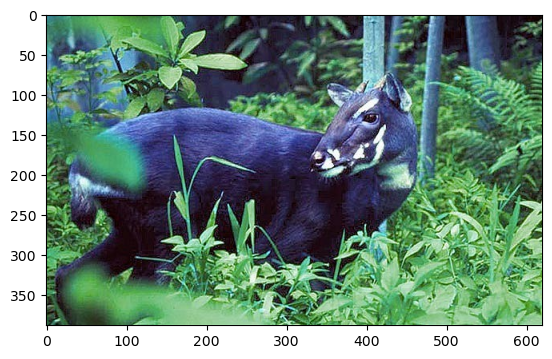

In [37]:
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define a function for feature reduction with PCA
def featureReductionA(features):
    n_components = 6 # The number of components you want after reduction
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features

# Load the KNeighborsClassifier model
modelA = joblib.load('D:/po/model_dt_A')

# Define a function to extract SIFT features
def siftFeatures(path):
    img = cv2.imread(path)
    if img is None:
        print(f"Error: Could not load the image from path {path}")
        return None
    
    # Convert to grayscale and resize
    gray = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (128, 128))
    
    # Initialize SIFT descriptor
    sift = cv2.SIFT_create()
    
    # Compute SIFT features
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    return descriptors

# Get the SIFT features for an image
input_features = siftFeatures('D:/cp/saola/s2.jpg')

if input_features is not None:
    # Reduce the dimensionality of input_features using PCA
    input_features_reduced = featureReductionA(input_features)

    # Predict using the reduced features
    modelA_pred = modelA.predict(input_features_reduced)

    # Check the class label with the highest predicted probability
    if modelA_pred[0] == 0:
        print("Detected image: saola")
    else:
        print("Detected image: deer")

    # Load and display the image
    img_path = cv2.imread('D:/cp/saola/s2.jpg')
    plt.imshow(img_path)
    plt.show()


In [ ]:
modelA_proba = modelA.predict_proba(input_features_reduced)


In [ ]:
modelA_proba

In [ ]:

import joblib
import cv2
import numpy as np

# Load the pre-trained KNN model
modelA = joblib.load('D:/cv/SIFT_LAB15/modelA_knn')

# Open the video file
video_path = 'D:/cv/animals/dog.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Video file not opened successfully.")
else:
    print("Video file opened successfully.")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Perform object/animal detection and classification here using the KNN model and SIFT features.
    # Modify this part according to your specific object detection and SIFT feature extraction code.
    
    # Example:
    # input_features = siftFeatures(frame)
    # input_features_reduced = featureReductionA(input_features)
    # modelA_pred = modelA.predict(input_features_reduced)

    # Check the class label with the highest predicted probability and annotate the frame.
    # Example:
    # if modelA_pred[0] == 0:
    #     label = "Animal"
    # else:
    #     label = "Object"
    
    # Annotate the frame with bounding box and label
    # Example:
    # cv2.putText(frame, label, (int(boxes[0] / 10), int(boxes[1] / 40)), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    
    # Display the annotated frame
    plt.imshow('output', frame)
                
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the video capture object and close windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define a function for feature reduction with PCA
def featureReductionA(features):
    n_components = 7  # The number of components you want after reduction
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features

# Load the KNeighborsClassifier model
modelA = joblib.load('D:/cv/SIFT_LAB15/modelA_knn')

# Get the SIFT features for an image
input_features = siftFeatures('D:/cv/animals/cats/cat795.jpg')

# Reduce the dimensionality of input_features using PCA
input_features_reduced = featureReductionA(input_features)

# Predict using the reduced features
modelA_pred = modelA.predict(input_features_reduced)

# Load the image
img_path = cv2.imread('D:/cv/animals/cats/cat795.jpg')

# Get the height and width of the image
height, width, _ = img_path.shape

# Check the class label with the highest predicted probability
if modelA_pred[0] == 0:
    detected_class = "cat"
    print("Detected image: cat")
else:
    detected_class = "dog"
    print("Detected image: dog")

# Find coordinates for the square (you can adjust the size as needed)
x, y, w, h = 50, 50, 100, 100  # Example coordinates and size for the square

# Draw a rectangle around the detected cat or dog
cv2.rectangle(img_path, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Annotate the image with the detected class
cv2.putText(img_path, f"Detected image: {detected_class}", (12, 32), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)

# Display the annotated image
plt.imshow(cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
import cv2

# Define the path to your video file
video_path = 'dog.mp4'  # Replace with your video file path

# Attempt to open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error: Video file not opened successfully.")
else:
    print("Video file opened successfully.")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (int(boxes[0] / 10), int(boxes[1] / 40)), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
                
        cv2.imshow('output', frame)
                
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

# Release the video capture object when you're done
cap.release()
cv2.destroyAllWindows()

In [ ]:
import joblib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define a function for feature reduction with PCA
def featureReductionA(features):
    n_components = 7  # The number of components you want after reduction
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features

# Load the KNeighborsClassifier model
modelA = joblib.load('D:/cv/SIFT_LAB15/modelA_knn')

# Function to detect and draw squares around animals
def detect_animal_and_draw_squares(image_path):
    img = cv2.imread(image_path)
    
    # Get the SIFT features for the entire image
    input_features = siftFeatures(img)
    
    # Reduce the dimensionality of input_features using PCA
    input_features_reduced = featureReductionA(input_features)

    # Predict using the reduced features
    modelA_pred = modelA.predict(input_features_reduced)

    # Find contours in the image
    contours, _ = cv2.findContours(modelA_pred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 1000:  # Adjust the area threshold as needed
            # Draw a square around the detected animal
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with squares around animals
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

# Call the function to detect animals and draw squares
image_path = "D:/cv/SIFT_LAB15/dogs/dog760.jpg"
detect_animal_and_draw_squares(image_path)



In [ ]:
import joblib

# Load your decision tree model
model = joblib.load('E:/r/model_dt_A')


In [ ]:
import cv2
import numpy as np

# Load and preprocess the image
image = cv2.imread('E:/r/tiger/p.jpeg')  # Load the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
image = cv2.resize(image, (128, 128))  # Resize the image to the same size used for model training


In [ ]:
# Assuming your decision tree model expects 6 features as input

# Load and preprocess the image
image = cv2.imread('E:/r/tiger/p.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (128, 128))

# Slide the window and preprocess it
for y in range(0, image.shape[0] - window_size[1], step_size):
    for x in range(0, image.shape[1] - window_size[0], step_size):
        # Extract the window from the image
        window = image[y:y + window_size[1], x:x + window_size[0]]

        # Preprocess the window to match the model's input format (e.g., resize, feature extraction)

        # Use the decision tree model to predict the window
        if window.shape == (6,):  # Assuming the model expects 6 features
            prediction = model.predict([window])

            if prediction == 1:
                # If the model predicts the presence of the animal, add a border around the window
                cv2.rectangle(image, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)


In [ ]:
prediction = model.predict([window])
print("Prediction:", prediction)  # Add this line


In [41]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [119]:
def data_look(saola_list, deer_list):
    data_dict = {}
    # Define a key in data_dict "n_saola" and store the number of saola images
    data_dict["n_saola"] = len(saola_list)
    # Define a key "n_deer" and store the number of deer images
    data_dict["n_deer"] = len(deer_list)
    # Read in a test image, either saola or deer
    saola_img = cv2.imread(saola_list[0])  # Use cv2.imread to read the image
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = saola_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = saola_img.dtype
    # Return data_dict
    return data_dict


In [120]:
def visualize_images(input_images, num_cols, figure_name, cmap = None):
  """Shows input images by stacking them in num_cols columns"""
  fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(24, 20))

  #fig = plt.gcf()
  #fig.canvas.set_window_title(figure_name)

  print(figure_name)

  for ax, image in zip(axes.flat, input_images):
    if(cmap == "gray" or cmap == 'hot'):
      ax.imshow(image, cmap=cmap)
    elif(image.shape[2]==1):
      ax.imshow(image[:,:,0], cmap = cmap)
    else:
      ax.imshow(image, cmap=cmap)

  plt.show()


In [121]:
import glob

#Read cars and not-cars images

#Data folders
saola_dir =     'D:/cp/saola/'
deer_dir = 'D:/cp/deer/'

# images are divided up into vehicles and non-vehicles
saola = []
deer = []

# Read vehicle images
images = glob.iglob(saola_dir + '/**/*.jpg', recursive=True)

for image in images:
        saola.append(image)
        
# Read non-vehicle images
images = glob.iglob(deer_dir + '/**/*.jpg', recursive=True)

for image in images:
        deer.append(image)
    
data_info = data_look(saola, deer)

print('Your function returned a count of', 
      data_info["n_saola"], ' saola and', 
      data_info["n_deer"], ' deer')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Your function returned a count of 39  saola and 99  deer
of size:  (480, 640, 3)  and data type: uint8


Example Saola images


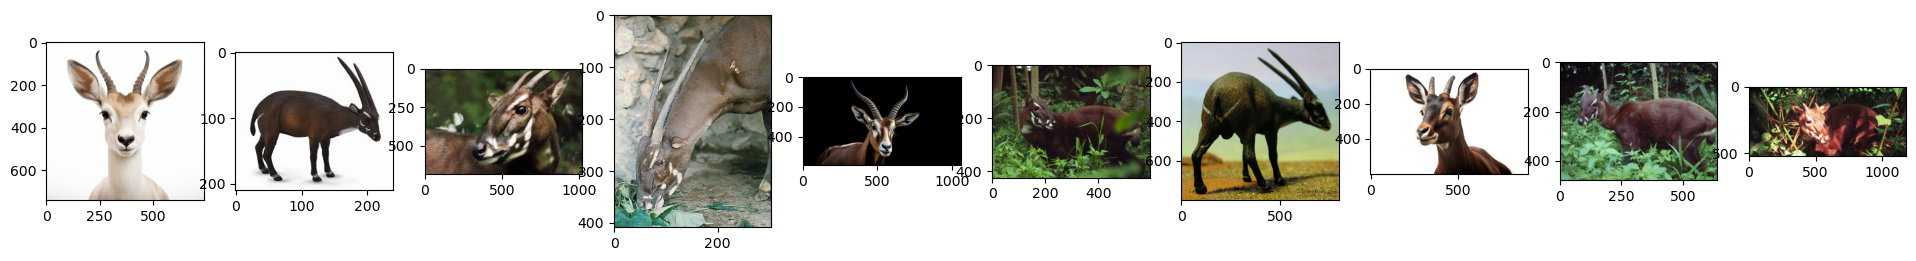

Example Deer images


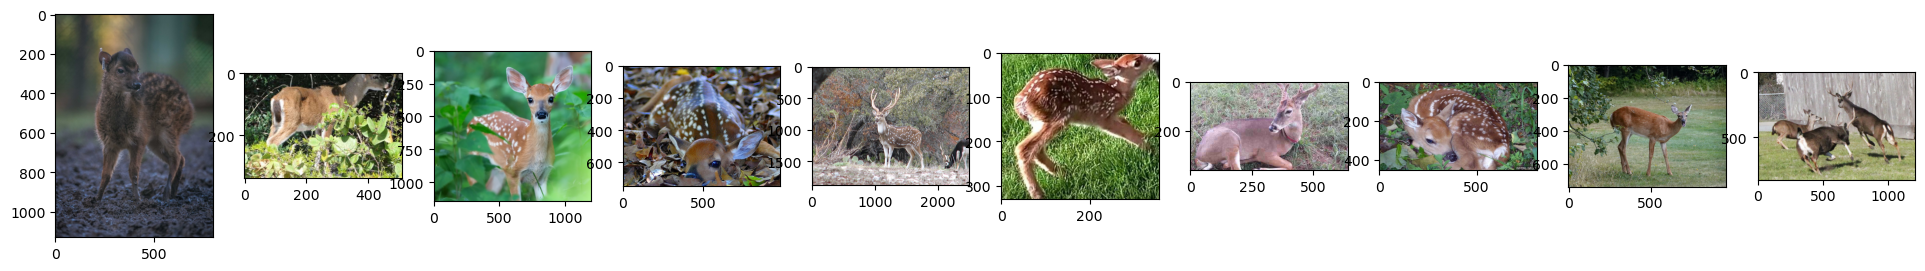

In [122]:
#Visualize some input images
import random

num_images = 10

# Just for fun choose random saola / deer indices and plot example images   
saola_samples = random.sample(list(saola), num_images)
deer_samples = random.sample(list(deer), num_images)
    
# Read in saola / deer images
saola_images = []
deer_images = []
for sample in saola_samples:
    saola_images.append(mpimg.imread(sample))
    
for sample in deer_samples:
    deer_images.append(mpimg.imread(sample))

visualize_images(saola_images, num_images, "Example Saola images")
visualize_images(deer_images, num_images, "Example Deer images")


In [127]:
#Helper functions for transforming the images to generate more images

import cv2 
import random

def translate_image(image, pos_range=2):
    """Perturbs the image by translating the image by - pos_range to + pos_range pixels"""
    rows, cols = image.shape[:2] 
    pos_x = pos_range * np.random.uniform() - pos_range/2
    pos_y = pos_range * np.random.uniform() - pos_range/2
    pos_M = np.float32([[1, 0, pos_x],[0, 1, pos_y]])

    return cv2.warpAffine(image, pos_M, (cols,rows))

def scale_image(image, scale = [1.0, 1.1, 1.2]):
    """Perturbs the image by the scale randomly selected from the 'scale' array"""
    scale_M = random.sample(scale, 1)[0]
    image = cv2.resize(image, None, fx = scale_M, fy = scale_M, interpolation = cv2.INTER_AREA)
    return image[0:64, 0:64, :]

def rotate_image(image, rot_range = 2):
    """Perturbs the image by rotation it by an angle randomly selected from rot_rangle"""
    rows, cols = image.shape[:2] 
    rot = np.random.uniform(rot_range)- rot_range/2
    rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), rot, 1)
    
    return cv2.warpAffine(image, rot_M, (cols,rows))

def affine_image(image, affine_range = 2):
    #Affine Transform
    rows, cols = image.shape[:2] 
    pts1 = np.float32([[5, 5],[10, 5],[5, 10]])

    pt1 = 5 + affine_range * np.random.uniform() - affine_range/2
    pt2 = 10 + affine_range * np.random.uniform() - affine_range/2

    pts2 = np.float32([[pt1, 5],[pt2, pt1],[5, pt2]])

    affine_M = cv2.getAffineTransform(pts1, pts2)
    return cv2.warpAffine(image, affine_M, (cols,rows))

def transform_image(image, pos_range = 2, rot_range = 2, scale = [1, 1.1], affine_range = 2):    
    image = translate_image(image, pos_range=5) 
    image = rotate_image(image, rot_range = 5)
    image = scale_image(image, scale = [1.2, 1.4, 1.0])
    is_blurred = random.sample([0, 1], 1)
    if is_blurred[0]:
        image = cv2.GaussianBlur(image,(3,3),0)

    return image

In [63]:
def convert_color(img, conv='RGB2YCrCb'):
    """
    Convert the image from one color space to the other
    """
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    if conv == 'RGB2HLS':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    if conv == 'RGB2HSV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    if conv == 'Gray':
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if conv == 'RGB2YUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

In [126]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

In [68]:
def plot3d(pixels, colors_rgb, axis_labels, axis_limits=None):
    """Plots a 3D point cloud with colors given by colors_rgb.

    Args:
        pixels: A numpy array of shape (H, W, 3) representing the 3D point cloud.
        colors_rgb: A numpy array of shape (H, W, 3) representing the RGB colors of the point cloud.
        axis_labels: A list of 3 strings representing the labels for the X, Y, and Z axes.
        axis_limits: A list of 3 tuples representing the limits for the X, Y, and Z axes.
    """

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Set the axis labels
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Set the axis limits
    if axis_limits is not None:
        ax.set_xlim(axis_limits[0])
        ax.set_ylim(axis_limits[1])
        ax.set_zlim(axis_limits[2])

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    plt.show()

plot3d(saola_images[1], convert_color(saola_images[1], 'RGB2RGB'), axis_labels=list("RGB"))
plot3d(deer_images[3], convert_color(deer_images[3], 'RGB2RGB'), axis_labels=list("RGB"))

plot3d(convert_color(saola_images[1], 'RGB2HLS'), saola_images[1], axis_labels=list("HLS"), axis_limits=((0, 360), (0, 100), (0, 100)))
plot3d(convert_color(deer_images[1], 'RGB2HLS'), deer_images[1], axis_labels=list("HLS"), axis_limits=((0, 360), (0, 100), (0, 100)))

plot3d(convert_color(saola_images[1], 'RGB2LUV'), saola_images[1], axis_labels=list("LUV"), axis_limits=((0, 100), (-134,220), (-140,122)))
plot3d(convert_color(deer_images[1], 'RGB2LUV'), deer_images[1], axis_labels=list("LUV"), axis_limits=((0, 100), (-134,220), (-140,122)))

plot3d(convert_color(saola_images[1], 'RGB2YCrCb'), saola_images[1], axis_labels=list("Yrb"), axis_limits=((0, 1), (0, 1), (0, 1)))
plot3d(convert_color(deer_images[1], 'RGB2YCrCb'), deer_images[1], axis_labels=list("Yrb"), axis_limits=((0, 1), (0, 1), (0, 1)))

plot3d(convert_color(saola_images[1], 'RGB2HSV'), saola_images[1], axis_labels=list("HSV"), axis_limits=((0, 360), (0, 100), (0, 100)))
plot3d(convert_color(deer_images[1], 'RGB2HSV'), deer_images[1], axis_labels=list("HSV"), axis_limits=((0, 360), (0, 100), (0, 100)))

plot3d(convert_color(saola_images[1], 'RGB2YUV'), saola_images[1], axis_labels=list("YUV"), axis_limits=((0, 1), (0


SyntaxError: incomplete input (3995082104.py, line 49)

Text(0.5, 1.0, 'YUV')

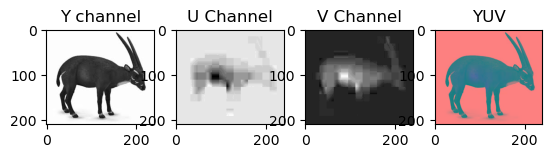

In [123]:
# # Plot the examples
fig = plt.figure()
plt.subplot(141)
yuv_image = convert_color(saola_images[1], 'RGB2YUV')
plt.imshow(yuv_image[:,:,0], cmap ="gray")
plt.title('Y channel')
plt.subplot(142)
plt.imshow(yuv_image[:,:,1], cmap ="gray")
plt.title('U Channel')
plt.subplot(143)
plt.imshow(yuv_image[:,:,2], cmap ="gray")
plt.title('V Channel')
plt.subplot(144)
plt.imshow(yuv_image)
plt.title('YUV')

In [93]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [124]:
from skimage.feature import hog

def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    """
    Return the hog features of the given input image
    Call with two outputs if vis==True"""
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualize=vis, feature_vector=feature_vec)
        return features

Text(0.5, 1.0, 'Deer HOG Visualization')

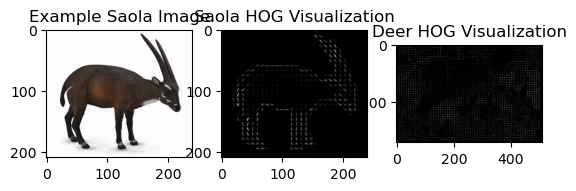

In [125]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

saola_features, hog_image = get_hog_features(cv2.cvtColor(saola_images[1], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

deer_features, deer_hog_image = get_hog_features(cv2.cvtColor(deer_images[1], cv2.COLOR_RGB2GRAY), orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True)

# Plot the examples
fig = plt.figure()
plt.subplot(131)
plt.imshow(saola_images[1])
plt.title('Example Saola Image')
plt.subplot(132)
plt.imshow(hog_image, cmap='gray')
plt.title('Saola HOG Visualization')
plt.subplot(133)
plt.imshow(deer_hog_image, cmap='gray')
plt.title('Deer HOG Visualization')


In [128]:
def bin_spatial(img, size=(16, 16)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

In [129]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [102]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel='ALL',
                        spatial_feat=False, hist_feat=False, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        image = (image * 255).astype(np.uint8)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)   

            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

In [110]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
    --------------------------------------- 0.2/9.3 MB 4.8 MB/s eta 0:00:02
   - -------------------------------------- 0.4/9.3 MB 4.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/9.3 MB 5.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.3 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.3 MB 5.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.4/9.3 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.3 MB 5.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.3 MB 5.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/9.3 MB 5.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.7/9.3 MB 5.7 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.3 MB 5.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.3/9.3 MB 5.9 MB/s eta 0:00:02
   --------------- 

  You can safely remove it manually.


401.8 Seconds to extract HOG features...


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 39 and the array at index 1 has size 99

In [ ]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')


In [ ]:
import pickle

#Pickle the data as it takes a lot of time to generate it

import os
data_file = 'D:/cv/svc_pickle.p'

if not os.path.isfile(data_file):
    with open(data_file, 'wb') as pfile:
        pickle.dump(
            {
                'svc': svc,
                'scaler': X_scaler,
                'orient': orient,
                'pix_per_cell': pix_per_cell,
                'cell_per_block': cell_per_block,
                'spatial_size': spatial_size,
                'hist_bins': hist_bins
                
            },
            pfile, pickle.HIGHEST_PROTOCOL)

print('Data saved in pickle file')

In [ ]:
# dist_pickle = pickle.load( open("../results/model/svc_pickle.p", "rb" ) )
# print(dist_pickle)
# svc = dist_pickle["svc"]
# X_scaler = dist_pickle["scaler"]
# orient = dist_pickle["orient"]
# pix_per_cell = dist_pickle["pix_per_cell"]
# cell_per_block = dist_pickle["cell_per_block"]
# spatial_size = dist_pickle["spatial_size"]
# hist_bins = dist_pickle["hist_bins"]

In [ ]:
#Read cars and not-cars images

#Data folders
test_images_dir = '../data/test_images/'

# images are divided up into vehicles and non-vehicles
test_images = []

images = glob.glob(test_images_dir + '*.jpg')

for image in images:
        test_images.append(mpimg.imread(image))

In [ ]:

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, vis_bboxes = False):
    
    draw_img = np.copy(img)
    xstart = int(img.shape[1]/5)
    xstop = img.shape[1]
    img_tosearch = img[ystart:ystop, xstart:xstop,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YUV')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))

    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step

    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    rectangles = []

    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3)).reshape(1, -1)
#             hog_features = np.hstack((hog_feat1))
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
#             subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
 
             # Get color features
#             spatial_features = bin_spatial(subimg, size=spatial_size)
#             hist_features = color_hist(subimg, nbins=hist_bins)
            # Scale features and make a prediction
#             stacked = np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1)
            test_features = X_scaler.transform(hog_features)   
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1 or vis_bboxes == True:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                rectangles.append(((xbox_left+xstart, ytop_draw+ystart),(xbox_left+win_draw+xstart,ytop_draw+win_draw+ystart)))
                              
    return rectangles

In [ ]:
def get_rectangles(image, scales = [1, 1.5, 2, 2.5, 3], 
                   ystarts = [400, 400, 450, 450, 460], 
                   ystops = [528, 550, 620, 650, 700]):
    out_rectangles = []
    for scale, ystart, ystop in zip(scales, ystarts, ystops):
        rectangles = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        if len(rectangles) > 0:
            out_rectangles.append(rectangles)
    out_rectangles = [item for sublist in out_rectangles for item in sublist] 
    return out_rectangles